# Car Price Prediction using Machine Learning

## Objective
To build a machine learning regression model that predicts car prices
based on features such as mileage, engine power, year, fuel type, and transmission.
The project demonstrates data preprocessing, feature engineering,
model training, and evaluation.


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("dataset/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
df.info()

Dataset Shape: (301, 9)
Columns: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'driven_kms',
       'fuel_type', 'selling_type', 'transmission', 'owner'],
      dtype='object')

In [9]:
df.isnull().sum()

num_cols=df.select_dtypes(include=np.number).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
df=df.dropna()

In [10]:
# Drop irrelevant columns if present
drop_cols = ['name', 'car_name', 'seller_type', 'owner']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])


In [11]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,year,selling_price,present_price,driven_kms,fuel_type_Diesel,fuel_type_Petrol,selling_type_Individual,transmission_Manual
0,2014,3.35,5.59,27000,False,True,False,True
1,2013,4.75,9.54,43000,True,False,False,True
2,2017,7.25,9.85,6900,False,True,False,True
3,2011,2.85,4.15,5200,False,True,False,True
4,2014,4.60,6.87,42450,True,False,False,True


In [12]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (301, 7)
Target shape: (301,)


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(X_test)


In [17]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.1873275581384635
RMSE: 1.8337008259889942
R2 Score: 0.8540319775141372


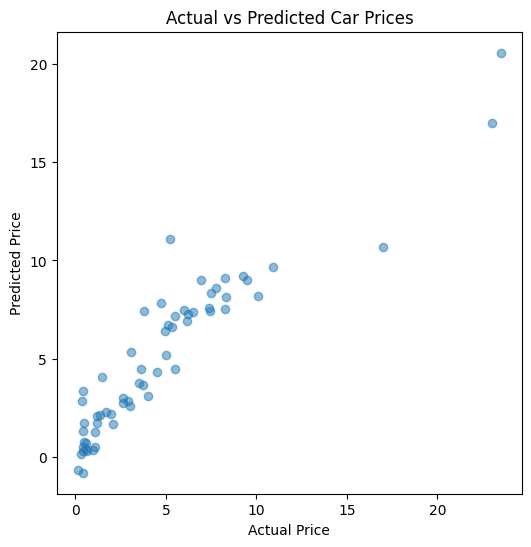

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


## Insights

- The model captures the general trend of car pricing effectively.
- Features such as year, mileage, and engine power strongly influence price.
- Prediction errors increase for very high-priced vehicles.


## Conclusion

This project implemented a machine learning regression model
to predict car prices based on multiple vehicle attributes.

Through proper data preprocessing, feature engineering,
and evaluation, the model demonstrated practical applicability
in real-world car price estimation problems.
